In [1]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

train_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\train"
validation_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\validation"
test_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\test"

# 对原数据进行旋转、翻转等增强
'''
ImageDataGenerator()函数中部分参数的解释：
rotation_range: 整数,随机旋转的度数范围.
width_shift_range: 图像在水平方向平移的范围(相对于总宽度的比例)
height_shift_range: 图像在垂直方向平移的范围(相对于总高度的比例)
shear_range: 随机错切变换的角度
horizontal_flip: 随机将图片水平翻转
fill_mode:  {"constant", "nearest", "reflect" or "wrap"} 之一,输入边界以外的点根据给定的模式填充：
                    'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
                    'nearest': aaaaaaaa|abcd|dddddddd
                    'reflect': abcddcba|abcd|dcbaabcd
                    'wrap': abcdabcd|abcd|abcdabcd
recale: 将像素点值乘以一个数
'''
train_datagen = ImageDataGenerator(rotation_range = 40, 
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             shear_range = 0.2,
                                                             horizontal_flip = True,
                                                             fill_mode = "nearest",
                                                             rescale = 1./255)
# 验证集和测试集不能增强
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size = (150, 150), 
                                                    class_mode = "binary", 
                                                    batch_size = 20)

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                             target_size = (150, 150),
                                                             class_mode = "binary",
                                                             batch_size = 50)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                 target_size = (150, 150), 
                                                 class_mode = "binary", 
                                                 batch_size = 20)

Using TensorFlow backend.


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
# 构建模型必要的头文件
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, SpatialDropout2D, Dropout
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [19]:
# 构建模型
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = 3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = 3))

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.3))

model.add(Dense(units = 1, activation = "sigmoid"))
# 显示模型
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
__________

In [20]:
# 编译模型
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# 运行模型
history = model.fit_generator(train_generator, 
                    steps_per_epoch = 100, 
                    epochs = 30, 
                    verbose = 1, 
                    validation_data = validation_generator,
                    validation_steps = 20)

# 测试模型
model.evaluate_generator(test_generator,
                        steps = 50, 
                        verbose = 1)

Epoch 1/30
100/100 [==============================] - 19s 191ms/step - loss: 0.6962 - acc: 0.5215 - val_loss: 0.6960 - val_acc: 0.4760
Epoch 2/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6932 - acc: 0.5285 - val_loss: 0.6821 - val_acc: 0.6020
Epoch 3/30
100/100 [==============================] - 18s 182ms/step - loss: 0.6764 - acc: 0.5770 - val_loss: 0.6663 - val_acc: 0.6160
Epoch 4/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6733 - acc: 0.6020 - val_loss: 0.6546 - val_acc: 0.6140
Epoch 5/30
100/100 [==============================] - 19s 185ms/step - loss: 0.6657 - acc: 0.5815 - val_loss: 0.6446 - val_acc: 0.6370
Epoch 6/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6450 - acc: 0.6395 - val_loss: 0.6009 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 18s 178ms/step - loss: 0.6158 - acc: 0.6665 - val_loss: 0.5882 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 1

[4.8997415399551389, 0.68300000309944153]

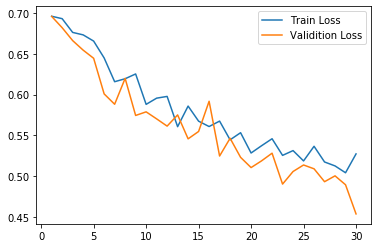

In [21]:
plt.figure()
epoch = [i for i in range(1, 31)]
plt.plot(epoch, history.history["loss"], label = "Train Loss")
plt.plot(epoch, history.history["val_loss"], label = "Validition Loss")
plt.legend()
plt.show()